In [2]:
# # run this only if you have not installed the requried packages
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install rasterio
# !pip install geopandas
# !pip install fiona

# 1 - Feature Extraction

### Loading required libraries

In [3]:
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
from sklearn.metrics import classification_report, accuracy_score

C:\Users\yashjadhav\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Providing the path to the data

In [4]:
raster_loc = "F:\\Project\\layerstack\\final_new.img"

points_loc = "F:\\Project\\Training_sets\\Final_TS\\fSamples.shp"
temp_point_loc = "F:\\Project\\Training_sets\\Final_TS\\ffTemp.shp"

In [5]:
gpd.read_file(temp_point_loc)

,label,id,geometry
0,1.0,0,POINT Z (289854.164 2089029.664 0.000)
1,1.0,1,POINT Z (289656.975 2088740.454 0.000)
2,1.0,2,POINT Z (289390.771 2088428.239 0.000)
3,1.0,3,POINT Z (289124.566 2088171.893 0.000)
4,1.0,4,POINT Z (288960.242 2088043.721 0.000)
...,...,...,...
295,3.0,295,POINT Z (283425.665 2059361.799 0.000)
296,3.0,296,POINT Z (291272.133 2062220.155 0.000)
297,3.0,297,POINT Z (295419.553 2059585.984 0.000)
298,3.0,298,POINT Z (296260.246 2058409.013 0.000)


In [6]:
gpd.read_file(points_loc)
    
# show(raster_loc)
# raster_loc.

,label,geometry
0,1.0,POINT Z (289854.164 2089029.664 0.000)
1,1.0,POINT Z (289656.975 2088740.454 0.000)
2,1.0,POINT Z (289390.771 2088428.239 0.000)
3,1.0,POINT Z (289124.566 2088171.893 0.000)
4,1.0,POINT Z (288960.242 2088043.721 0.000)
...,...,...
295,3.0,POINT Z (283425.665 2059361.799 0.000)
296,3.0,POINT Z (291272.133 2062220.155 0.000)
297,3.0,POINT Z (295419.553 2059585.984 0.000)
298,3.0,POINT Z (296260.246 2058409.013 0.000)


In [7]:
# plt.plot(temp_point_loc)

In [8]:
# print(raster_loc.meta)
# gdf

In [9]:
# You can add more classes as per your reqirement 
# Here i used subset sentinel image for this project you can change it to landsat or any other images 
# For data creation i used arcgis pro software and create two shapefile which i read in above cell 
# Note: Don't forgot to check Z-value block while creating the shapefile it is important 
#  and use only arcgis pro . "I've tried with qgis but it didn't work "

In [31]:
# land cover names (for post visualization)
lulc_name = ['Water', 'Mangrove', 'others']

### Loading  data

### Visualizing the data

In [11]:
src = rio.open(raster_loc)

blue = src.read(1, masked=True)
green = src.read(2, masked=True)
red = src.read(3, masked=True)
nir = src.read(4, masked=True)
 
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
nirn = normalize(nir)

In [12]:
nirn

masked_array(
  data=[[0.1768237054347992, 0.1616860181093216, 0.17003785073757172,
         ..., 0.03327678516507149, 0.036539215594530106,
         0.055591803044080734],
        [0.18791596591472626, 0.18400104343891144, 0.18791596591472626,
         ..., 0.03510374575853348, 0.03706120327115059,
         0.04397755488753319],
        [0.1799556314945221, 0.17786768078804016, 0.18230457603931427,
         ..., 0.03171081840991974, 0.03171081840991974,
         0.030797338113188744],
        ...,
        [0.045413024723529816, 0.045413024723529816,
         0.045282527804374695, ..., 0.03536473959684372,
         0.03745269402861595, 0.04306407272815704],
        [0.04645700007677078, 0.04580451548099518, 0.04567401856184006,
         ..., 0.03405976668000221, 0.030797338113188744,
         0.036017224192619324],
        [0.04463003948330879, 0.04476053640246391, 0.045021530240774155,
         ..., 0.030797338113188744, 0.028709381818771362,
         0.032754797488451004]],
  mask=[[

In [13]:
# nirn.min()

check shape, dtype, 

In [14]:
# print(blue.shape)
# print(green.shape)
# print(red.shape)
# print(nir.shape)

In [15]:
# print(blue.dtype)
# print(green.dtype)
# print(red.dtype)
# print(nir.dtype)

In [16]:
# print(bluen.shape)
# print(greenn.shape)
# print(redn.shape)
# print(nirn.shape)

### RGB Visualize

In [17]:
# In my image there is some problem you can visulize the image with rgb, but i have to take gbr for FCC 
# you can see it below 

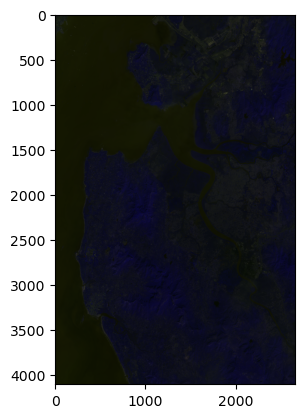

In [18]:
rgb = np.dstack((redn, greenn, bluen))

plt.imshow(rgb)

C:\Users\yashjadhav\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


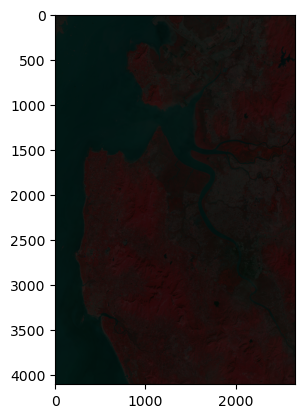

In [19]:
# Calculate the percentile values for each band, ignoring NaN values
blue_percentile = np.nanpercentile(bluen, 95)
green_percentile = np.nanpercentile(greenn, 95)
red_percentile = np.nanpercentile(redn, 95)

# Stack the bands with adjusted percentile values
rgb_brighter = np.dstack((
    np.clip(bluen, 0, blue_percentile),
    np.clip(greenn, 0, green_percentile),
    np.clip(redn, 0, red_percentile)
))

# Display the image
plt.imshow(rgb_brighter)
plt.show()
# plt.colorbar()

### True Color Composite Visualize

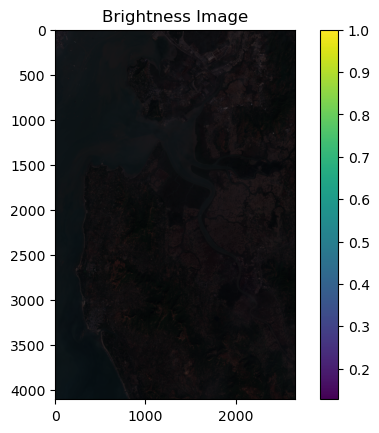

In [21]:
nrg = np.dstack((nirn, redn,greenn))
# Calculate the 2nd and 98th percentiles for brightness adjustment
p2, p98 = np.nanpercentile(nrg, (99, 100))

# Plot the image with adjusted brightness
plt.imshow(nrg, vmin=p2, vmax=p98)
plt.title('Brightness Image')
plt.colorbar()
plt.show()


In [22]:
nrg.shape

(4101, 2659, 3)

In [23]:
nrg.dtype

dtype('float32')

### Visualizing each bands

Text(0.5, 1.0, 'Blue')

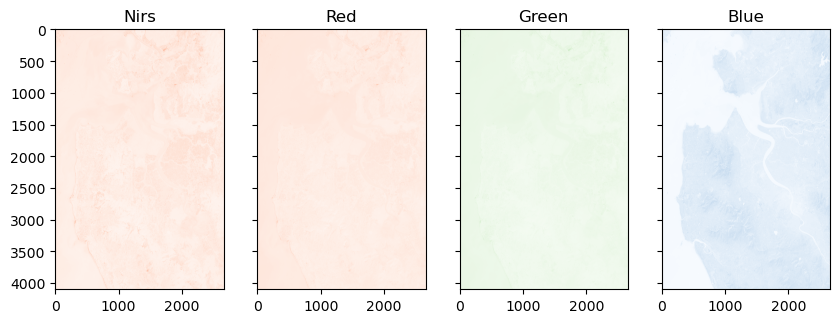

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
ax1.imshow(nirn, cmap='Reds')
ax2.imshow(redn, cmap='Reds')
ax3.imshow(greenn, cmap='Greens')
ax4.imshow(bluen, cmap='Blues')

# Add titles
ax1.set_title("Nirs")
ax2.set_title("Red")
ax3.set_title("Green")
ax4.set_title("Blue")
# you can adjust the brightness of the band 

In [ ]:
# create labled df for classification 

In [68]:
#  reading bands from input
with rio.open(raster_loc) as img:
    bands = (img.read()).shape[0]
print('Bands of input image: ', bands)

# using ilteration to automatically create a bands list
features = []
for i in range(bands):
    features.append('band'+str(i+1))
print('Bands names: ', features)
f_len = len(features)

points = gpd.read_file(points_loc)
# adding a new column 'id' with range of points
points = points.assign(id=range(len(points)))
# saving nenw point file with 'id'
points.to_file(temp_point_loc) 
# converting gdf to pd df and removing geometry
points_df = pd.DataFrame(points.drop(columns='geometry'))

# ilterating over multiband raster
sampled = pd.Series()

#inputShape= temp_point_loc
# Read input shapefile with fiona and iterate over each feature
with fiona.open(temp_point_loc) as shp:
    for feature in shp:
        siteID = feature['properties']['id']
        coords = feature['geometry']['coordinates']
        # Read pixel value at the given coordinates using Rasterio
        # NB: `sample()` returns an iterable of ndarrays.
        with rio.open(raster_loc) as stack_src:
                  value = [v for v in stack_src.sample([coords])]
        # Update the pandas serie accordingly
        sampled.loc[siteID] = value

# reshaping sampled values
df1 = pd.DataFrame(sampled.values.tolist(), index=sampled.index)
df1['id'] = df1.index
df1 = pd.DataFrame(df1[0].values.tolist(), 
                   columns=features)
df1['id'] = df1.index

data = pd.merge(df1, points_df, on ='id')
print('Sampled Data: \n',data)

x = data.iloc[:,0:f_len]
X = x.values
y = data.iloc[:,-1]
Y = y.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')


Bands of input image:  4
Bands names:  ['band1', 'band2', 'band3', 'band4']
Sampled Data: 
       band1   band2   band3   band4   id  label
0    1481.0  2116.0  1964.0  1771.0    0    1.0
1    1427.0  2101.0  1944.0  1735.0    1    1.0
2    1485.0  2136.0  1986.0  1771.0    2    1.0
3    1538.0  2144.0  1977.0  1783.0    3    1.0
4    1485.0  2160.0  2011.0  1755.0    4    1.0
..      ...     ...     ...     ...  ...    ...
295  3057.0  1984.0  1828.0  1591.0  295    3.0
296  2863.0  2014.0  1885.0  1619.0  296    3.0
297  3045.0  2054.0  1924.0  1711.0  297    3.0
298  3338.0  2038.0  1901.0  1598.0  298    3.0
299  2149.0  2067.0  1883.0  1835.0  299    3.0

[300 rows x 6 columns]
X_train Shape: (210, 4)
X_test Shape: (90, 4)
y_train Shape: (210,)
y_test Shape:(90,)


In [69]:
data
# this how how your df looks like 

,band1,band2,band3,band4,id,label
0,1481.0,2116.0,1964.0,1771.0,0,1.0
1,1427.0,2101.0,1944.0,1735.0,1,1.0
2,1485.0,2136.0,1986.0,1771.0,2,1.0
3,1538.0,2144.0,1977.0,1783.0,3,1.0
4,1485.0,2160.0,2011.0,1755.0,4,1.0
...,...,...,...,...,...,...
295,3057.0,1984.0,1828.0,1591.0,295,3.0
296,2863.0,2014.0,1885.0,1619.0,296,3.0
297,3045.0,2054.0,1924.0,1711.0,297,3.0
298,3338.0,2038.0,1901.0,1598.0,298,3.0


In [70]:
# data[data['label']==0.0]

In [65]:
# data.drop(data[data['label'] == 0.0].index, inplace=True)

None


# Support Vector Machine (SVM)

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
cName = 'SVM'
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)

clf_pred = svm_clf.predict(X_test)
svm_Accuracy =accuracy_score(y_test, clf_pred)*100
print(f"Accuracy {cName}: {svm_Accuracy}")
print(classification_report(y_test, clf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, clf_pred)
print('Confusion Matrix RF: \n',cm)
cm_percent = cm/np.sum(cm)

plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(cm_percent,
            xticklabels=lulc_name,
            yticklabels=lulc_name,
            cmap="YlGn",
            annot=True,
            fmt='.2%',
            cbar=False,
            linewidths=2,
            linecolor='black')

plt.title(cName)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig(f'../figs/confusion_matrix_{cName}.png', dpi=300, bbox_inches='tight')

## full data reshaping, predicting, and saving output

In [83]:
%%time
cName = 'SVM'
exp_name =  f"F:\\Project\\layerstack\\Report_outputs\\{cName}.img"


img = rio.open(raster_loc)
img_arr = img.read()
bands = img_arr.shape[0]
print(f'Height: {img_arr.shape[1]}\nWidth: {img_arr.shape[2]}\nBands: {img_arr.shape[0]}\n')
img_n = np.moveaxis(img_arr, 0, -1)
img_n = img_n.reshape(-1, f_len)
print('reshaped full data shape  for prediction: ',img_n.shape)
metadata = img.meta
height = metadata.get('height')
width = metadata.get('width')
crs = metadata.get('crs')
transform = metadata.get('transform')


pred_full = svm_clf.predict(img_n)

print('Prediction Done, now exporting raster \n')

img_reshape = pred_full.reshape(height, width)

out_raster = rio.open(exp_name,
                                         'w',
                                          driver='GTiff',
                                          height=height,
                                          width=width,
                                          count=1,
                                          dtype='uint8',
                                          crs=crs,
                                          transform = transform,
                                          nodata = 255 #nodata
                                          )
 
out_raster.write(img_reshape, 1)
out_raster.close()

print(f'Map saved {cName}.................')

## Random Forest

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pipeline
rf_pipeline = make_pipeline(
    StandardScaler(),  # Standardize features
    RandomForestClassifier(random_state=42)  # Random Forest Classifier
)

# Train the pipeline
rf_pipeline.fit(X_train, y_train)

# Predict using the pipeline
clf_pred = rf_pipeline.predict(X_test)

# Calculate accuracy
rf_Accuracy = accuracy_score(y_test, clf_pred) * 100
print(f"Accuracy RF: {rf_Accuracy}")

# Print classification report
print(classification_report(y_test, clf_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, clf_pred)
print('Confusion Matrix RF: \n', cm)
cm_percent = cm / np.sum(cm)

plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(cm_percent,
            xticklabels=lulc_name,
            yticklabels=lulc_name,
            cmap="YlGn",
            annot=True,
            fmt='.2%',
            cbar=False,
            linewidths=2,
            linecolor='black')

plt.title('RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## full data reshaping, predicting, and saving output

In [81]:
%%time

cName = 'RF'
exp_name = f"F:\\Project\\layerstack\\Report_outputs\\{cName}.img"

img = rio.open(raster_loc)
img_arr = img.read()
bands = img_arr.shape[0]
print(f'Height: {img_arr.shape[1]}\nWidth: {img_arr.shape[2]}\nBands: {img_arr.shape[0]}\n')
img_n = np.moveaxis(img_arr, 0, -1)
img_n = img_n.reshape(-1, f_len)
print('reshaped full data shape  for prediction: ',img_n.shape)


pred_full = rf_pipeline.predict(img_n)

print('Prediction Done, now exporting raster \n')
# Predefining out raster meta using variable raster
tempfile_arr = img.read(1)
tempfile_arr = tempfile_arr.reshape(-1,1)
metadata = img.meta

height = metadata.get('height')
width = metadata.get('width')
crs = metadata.get('crs')
transform = metadata.get('transform')

img_reshape = pred_full.reshape(height, width)

out_raster = rio.open(exp_name,
                                         'w',
                                          driver='GTiff',
                                          height=height,
                                          width=width,
                                          count=1,
                                          dtype='uint8',
                                          crs=crs,
                                          transform = transform,
                                          nodata = 255 #nodata
                                          )

out_raster.write(img_reshape, 1)
out_raster.close()

print(f'Map saved {cName}.................')

## Decision Tree

In [77]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cName = 'DT'

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

clf_pred = dt_clf.predict(X_test)
dt_Accuracy = accuracy_score(y_test, clf_pred)*100
print(f"Accuracy {cName}: {dt_Accuracy}")
print(classification_report(y_test, clf_pred))

# Confusion Matrix

cm = confusion_matrix(y_test, clf_pred)
print('Confusion Matrix RF: \n',cm)
cm_percent = cm/np.sum(cm)

plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(cm_percent,
            xticklabels=lulc_name,
            yticklabels=lulc_name,
            cmap="YlGn",
            annot=True,
            fmt='.2%',
            cbar=False,
            linewidths=2,
            linecolor='black')

plt.title(cName)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig(f'../figs/confusion_matrix_{cName}.png', dpi=300, bbox_inches='tight')

In [76]:
%%time

cName = 'DT'
exp_name = f"F:\\Project\\layerstack\\Report_outputs\\{cName}.img"

img = rio.open(raster_loc)
img_arr = img.read()
bands = img_arr.shape[0]
print(f'Height: {img_arr.shape[1]}\nWidth: {img_arr.shape[2]}\nBands: {img_arr.shape[0]}\n')
img_n = np.moveaxis(img_arr, 0, -1)
img_n = img_n.reshape(-1, f_len)
print('reshaped full data shape  for prediction: ',img_n.shape)


pred_full = dt_clf.predict(img_n)

print('Prediction Done, now exporting raster \n')
# Predefining out raster meta using variable raster
tempfile_arr = img.read(1)
tempfile_arr = tempfile_arr.reshape(-1,1)
metadata = img.meta

height = metadata.get('height')
width = metadata.get('width')
crs = metadata.get('crs')
transform = metadata.get('transform')

img_reshape = pred_full.reshape(height, width)

out_raster = rio.open(exp_name,
                                         'w',
                                          driver='GTiff',
                                          height=height,
                                          width=width,
                                          count=1,
                                          dtype='uint8',
                                          crs=crs,
                                          transform = transform,
                                          nodata = 255 #nodata
                                          )

out_raster.write(img_reshape, 1)
out_raster.close()

print(f'Map saved {cName}.................')

[0. 1. 2. 3.]


# XGBoost

In [73]:
%%time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

cName = 'XGB'
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

clf_pred = xgb_clf.predict(X_test)
xgb_Accuracy = accuracy_score(y_test, clf_pred)*100
print(f"Accuracy {cName}: {xgb_Accuracy}")
print(classification_report(y_test, clf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, clf_pred)
print(f'Confusion Matrix {cName}: \n', cm)
cm_percent = cm / np.sum(cm)

plt.figure(figsize=(7, 7), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(cm_percent,
            xticklabels=lulc_name,
            yticklabels=lulc_name,
            cmap="YlGn",
            annot=True,
            fmt='.2%',
            cbar=False,
            linewidths=2,
            linecolor='black')

plt.title(cName)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [74]:
cName = 'XGB'
exp_name = f"F:\\Project\\layerstack\\Report_outputs\\{cName}.img"

img = rio.open(raster_loc)
img_arr = img.read()
bands = img_arr.shape[0]
print(f'Height: {img_arr.shape[1]}\nWidth: {img_arr.shape[2]}\nBands: {img_arr.shape[0]}\n')
img_n = np.moveaxis(img_arr, 0, -1)
img_n = img_n.reshape(-1, f_len)
print('reshaped full data shape for prediction: ', img_n.shape)

pred_full = xgb_clf.predict(img_n)

print('Prediction Done, now exporting raster \n')
metadata = img.meta

height = metadata.get('height')
width = metadata.get('width')
crs = metadata.get('crs')
transform = metadata.get('transform')

img_reshape = pred_full.reshape(height, width)

out_raster = rio.open(exp_name,
                      'w',
                      driver='GTiff',
                      height=height,
                      width=width,
                      count=1,
                      dtype='uint8',
                      crs=crs,
                      transform=transform,
                      nodata=255)

out_raster.write(img_reshape, 1)
out_raster.close()

print(f'Map saved {cName}.................')

In [ ]:
# DT  - 92.22222222222223
# RF  - 88.88888888888889
# SVM - 88.88888888888889

In [ ]:
DT = rio.open("F:\\Project\\layerstack\\final_newDT.img")
RF = rio.open("F:\\Project\\layerstack\\final_newRF.img")
SVM = rio.open("F:\\Project\\layerstack\\final_newSVM.img")
XGB = rio.open("F:\\Project\\layerstack\\XGB.img")

In [ ]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)

# Remove grid
for ax in axes:
    ax.grid(False)

# Plot images
show(DT, ax=axes[0], cmap='RdYlBu')
show(RF, ax=axes[1], cmap='RdYlBu')
show(SVM, ax=axes[2], cmap='RdYlBu')
show(XGB, ax=axes[3], cmap='RdYlBu')

# Add titles
axes[0].set_title(f"DT: {dt_Accuracy.round(2)}%")
axes[1].set_title(f"RF: {rf_Accuracy.round(2)}%")
axes[2].set_title(f"SVM: {svm_Accuracy.round(2)}%")
axes[3].set_title(f"XGB: {xgb_Accuracy.round(2)}%")

# Adjust spacing
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

In [85]:
# can you plot individula plot for perticular algorithm 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Initialize subplots
fig, ax = plt.subplots(figsize=(5, 7))

# Plot image
show(DT, ax=ax, cmap='RdYlBu')

# Add title
ax.set_title(f"DT: {dt_Accuracy.round(2)}%")

# Remove grid and axes
ax.grid()

# ax.axis()

# Create custom legend
water_patch = mlines.Line2D([], [], color='red', marker='o', markersize=1, label='Water')
veg_patch = mlines.Line2D([], [], color='#FFFDD0', marker='o', markersize=1, label='mangroves')
other_patch = mlines.Line2D([], [], color='blue', marker='o', markersize=1, label='Others')

# Add legend
legend_patches = [water_patch, veg_patch, other_patch]
legend = ax.legend(handles=legend_patches, loc='lower left', bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=7)

# Change legend background color
legend.get_frame().set_facecolor('lightgray')
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [ ]:
import os
# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)
# Remove grid
for ax in axes:
    ax.grid(False)
# Plot images
show(DT, ax=axes[0], cmap='RdYlBu')
show(RF, ax=axes[1], cmap='RdYlBu')
show(SVM, ax=axes[2], cmap='RdYlBu')
show(XGB, ax=axes[3], cmap='RdYlBu')

# Add titles
axes[0].set_title(f"DT: {dt_Accuracy }")
axes[1].set_title(f"RF: {rf_Accuracy}")
axes[2].set_title(f"SVM: {svm_Accuracy}")
axes[3].set_title(f"XGB: {xgb_Accuracy}")

# Adjust spacing
plt.subplots_adjust(wspace=0.3)

# Create a directory to save the images
os.makedirs('images', exist_ok=True)

# Save each subplot as an individual image file
for i, ax in enumerate(axes):
    filename = f'F:\\Project\\layerstack\\Report_outputs{i}.jpeg'
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, bbox_inches=extent.expanded(1.1, 1.2), dpi=300)

# Show the plot
plt.show()

In [75]:
# Note : sometimes XXGB alogorithms can give you error , it takes too much spacefrom your c drive use carefully 
# if it is giving you an error then clean you rc drive and re run it 